In [3]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm
import statsmodels.api as sm

In [2]:
def generate_uniform(N):
    a = np.sqrt(3)
    return np.random.uniform(-a, a, N)

def generate_normal(N):
    return np.random.normal(0, 1, N)

def generate_exp(N):
    return np.random.exponential(1, N) - 1

# практика

In [ ]:
import statsmodels.api as sm

def autocorrelation(signal):
    return sm.tsa.acf(signal, nlags = len(signal)-1)

def confidence_intervals(acf_all):
    acf_all = np.array(acf_all)
    lower_bound = np.min(acf_all, axis=0)
    upper_bound = np.max(acf_all, axis=0)
    return lower_bound, upper_bound

def find_tau(acf, ci):
    lower_bound, upper_bound = ci
    for tau, value in enumerate(acf):
        if lower_bound[tau] <= 0 <= upper_bound[tau]:
            return tau
    return len(acf)

N = 100
noise_level = 0.5
taus = []

for dist, name in [(generate_uniform, "Uniform"), (generate_normal, "Normal"), (generate_exp, "Exponential")]:
    tau = []
    for k in range(100):
      acf_all = []
      cur_dist = dist(N)
      for _ in range(100):
          signal = cur_dist + np.random.uniform(-noise_level, noise_level, N)
          ac = autocorrelation(signal)
          acf_all.append(ac)

      ci = [[], []]
      for i in range(100):
          t = [x[i] for x in acf_all]
          ci[0].append(min(t))
          ci[1].append(max(t))
          if min(t) <= 0 and 0 <= max(t):
            tau.append(i)
            break
    taus.append(tau)

    # ci = confidence_intervals(acf_all)

    # tau = [find_tau(ac, ci) for ac in acf_all]
    # taus.append(tau)

    # plt.figure(figsize=(10, 6))
    # for ac in acf_all[:1]:
    #     plt.plot(ac, alpha=0.5)
    # plt.fill_between(np.arange(len(acf_all[0])), ci[0], ci[1], color='gray', alpha=0.2, label='Confidence Interval')
    # plt.axhline(0, color='red', linestyle='--', linewidth=1)
    # plt.title(f"ACF and Confidence Intervals for {name} Distribution")
    # plt.xlabel("Lag")
    # plt.ylabel("ACF")
    # plt.grid()
    # plt.legend()
    # plt.show()

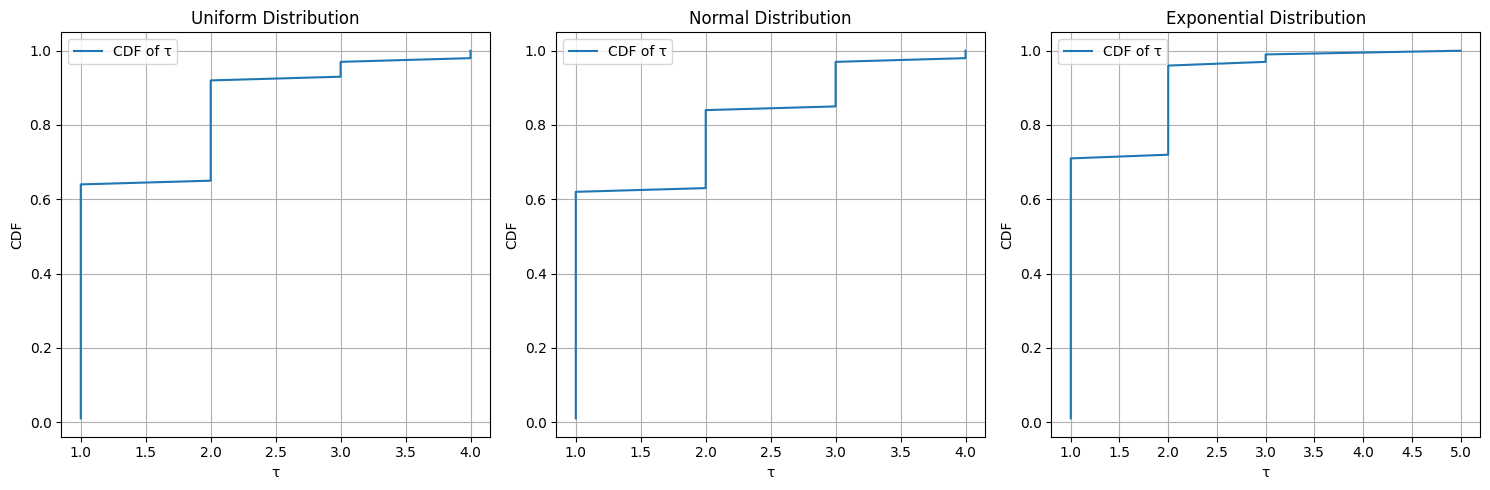

In [ ]:
def plot_cdf(taus, title):
    sorted_taus = np.sort(taus)
    cdf = np.arange(1, len(taus) + 1) / len(taus)
    plt.plot(sorted_taus, cdf, label=f"CDF of τ")
    plt.title(title)
    plt.xlabel("τ")
    plt.ylabel("CDF")
    plt.grid()
    plt.legend()

plt.figure(figsize=(15, 5))

distributions = [
    (taus[0], "Uniform Distribution"),
    (taus[1], "Normal Distribution"),
    (taus[2], "Exponential Distribution"),
]

for i, (tau, title) in enumerate(distributions):
    plt.subplot(1, 3, i + 1)
    plot_cdf(tau, title)

plt.tight_layout()
plt.show()

# дз

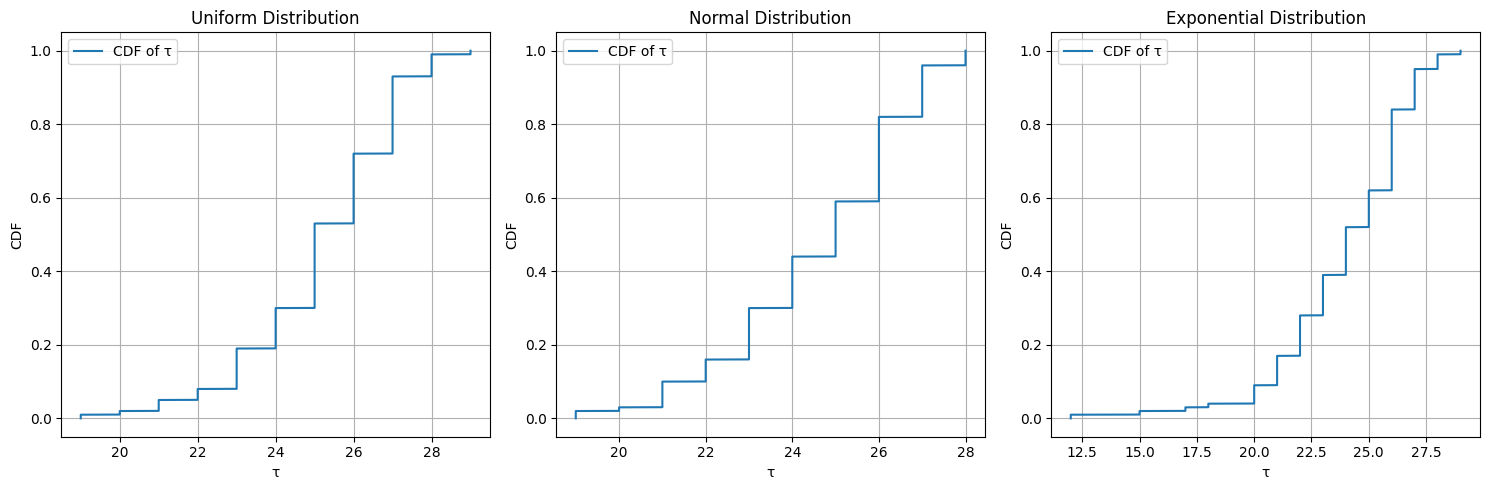

In [4]:
# Функция для генерации сигнала x(t) = 5 * exp(-2 * t / n)
def generate_signal_with_decay(N):
    t = np.arange(N)
    return 5 * np.exp(-2 * t / N)

# Функция для вычисления автокорреляции
def autocorrelation(signal):
    return sm.tsa.acf(signal, nlags=len(signal)-1)

# Функция для расчета доверительных интервалов
def confidence_intervals(acf_all):
    acf_all = np.array(acf_all)
    lower_bound = np.min(acf_all, axis=0)
    upper_bound = np.max(acf_all, axis=0)
    return lower_bound, upper_bound

# Функция для нахождения τ
def find_tau(acf, ci):
    lower_bound, upper_bound = ci
    for tau, value in enumerate(acf):
        if lower_bound[tau] <= 0 <= upper_bound[tau]:
            return tau
    return len(acf)

# Основной цикл генерации сигналов и расчетов
N = 100
noise_level = 0.5
taus = []

# Для каждого распределения
for dist, name in [(generate_uniform, "Uniform"), (generate_normal, "Normal"), (generate_exp, "Exponential")]:
    tau = []
    for k in range(100):
        acf_all = []
        signal = generate_signal_with_decay(N)
        for _ in range(100):
            # Добавление шума
            noisy_signal = signal + dist(N) + np.random.uniform(-noise_level, noise_level, N)
            ac = autocorrelation(noisy_signal)
            acf_all.append(ac)

        # Вычисление доверительных интервалов
        ci = confidence_intervals(acf_all)
        # Нахождение τ для каждого сигнала
        tau_values = [find_tau(ac, ci) for ac in acf_all]
        tau.extend(tau_values)

    taus.append(tau)

# Функция для построения CDF
def plot_cdf(taus, title):
    sorted_taus = np.sort(taus)
    cdf = np.arange(1, len(taus) + 1) / len(taus)
    plt.plot(sorted_taus, cdf, label=f"CDF of τ")
    plt.title(title)
    plt.xlabel("τ")
    plt.ylabel("CDF")
    plt.grid()
    plt.legend()

# Построение графиков для каждого распределения
plt.figure(figsize=(15, 5))

distributions = [
    (taus[0], "Uniform Distribution"),
    (taus[1], "Normal Distribution"),
    (taus[2], "Exponential Distribution"),
]

for i, (tau, title) in enumerate(distributions):
    plt.subplot(1, 3, i + 1)
    plot_cdf(tau, title)

plt.tight_layout()
plt.show()